<a href="https://colab.research.google.com/github/akshayaxo/hanwrittendetectionusing-cnn/blob/main/handwrittendetectionusingcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand written Text Recognition Using CNN**

In [3]:
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten

In [4]:
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# Getting image shape
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
ytrain[0]

5

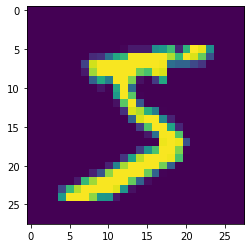

In [8]:
plt.imshow(xtrain[0])

In [9]:
# Reshape the data 
X_train = xtrain.reshape(60000,28,28,1)
X_test = xtest.reshape(10000,28,28,1)

In [10]:
#One - Hot encoding
y_train_one_hot = to_categorical(ytrain)
y_test_one_hot = to_categorical(ytest)

print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
#CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
# Train the model
hist = model.fit(X_train, y_train_one_hot,validation_data=(X_test,y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 174s 92ms/step - loss: 0.2077 - accuracy: 0.9554 - val_loss: 0.0817 - val_accuracy: 0.9743
Epoch 2/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.0920 - val_accuracy: 0.9742
Epoch 3/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0945 - val_accuracy: 0.9736


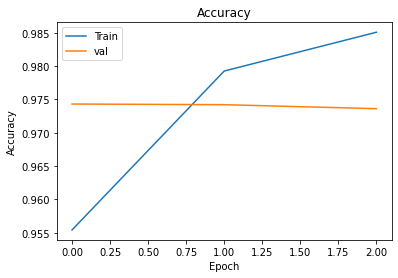

In [14]:
#Visualize the accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

In [18]:
#predictions for the first 5 images
predictions = model.predict(X_test[5:10])
predictions

array([[1.51835300e-09, 9.99993920e-01, 1.25769875e-08, 6.50275805e-11,
        1.23310576e-06, 2.57603583e-09, 1.45243051e-09, 1.06984112e-06,
        3.84357782e-06, 3.88169763e-09],
       [1.21433583e-14, 2.28255900e-10, 8.66623559e-13, 2.92818981e-12,
        9.99998212e-01, 5.10499909e-08, 2.79056444e-14, 4.69612613e-11,
        1.48254287e-06, 3.02743587e-07],
       [2.03609782e-25, 2.58490209e-15, 3.24667100e-17, 4.33525530e-13,
        1.89970720e-07, 4.90737034e-11, 4.24551814e-18, 4.29183283e-16,
        1.43819757e-13, 9.99999762e-01],
       [4.94048358e-08, 1.82186220e-15, 1.25956728e-11, 2.28372312e-12,
        1.97902500e-10, 9.57665324e-01, 4.13741693e-02, 1.16569827e-11,
        9.60462668e-04, 7.78978326e-10],
       [5.53224323e-14, 4.54813054e-14, 1.86731987e-16, 5.16426901e-09,
        2.97022107e-05, 1.71354684e-11, 6.38655998e-14, 6.48728092e-05,
        2.38181215e-07, 9.99905229e-01]], dtype=float32)

In [20]:
print(np.argmax(predictions, axis=1))
print(ytest[5:10])

[1 4 9 5 9]
[1 4 9 5 9]


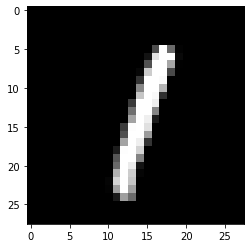

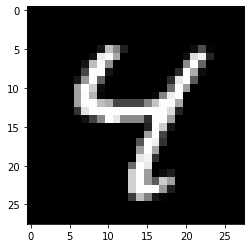

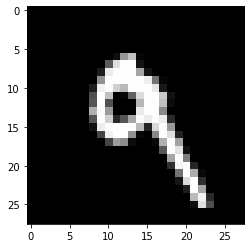

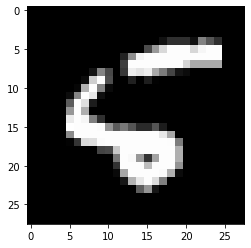

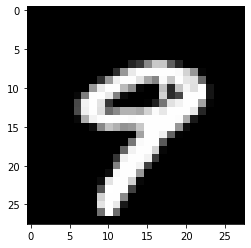

In [21]:
for i in range(5,10):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape(28,28)
  plt.imshow(pixels, cmap='gray')
  plt.show()